In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,recall_score, f1_score
import seaborn as sns

In [4]:
# Load data
data = pd.read_csv("output.csv")
df = pd.DataFrame(data)

# Map categorical variables
df['GENDER'] = df['GENDER'].map({'Male': 1, 'Female': 0})
df['VITAMIN_D_STATUS'] = pd.Categorical(df['VITAMIN_D_STATUS'], 
                                        categories=['Deficient', 'Sufficient'], 
                                        ordered=True)
df['VITAMIN_D_STATUS'] = df['VITAMIN_D_STATUS'].cat.codes

In [5]:
# Prepare features and labels
X = df[["AGE", "GENDER", "WEIGHT", "VITAMIN_D_LEVEL"]]
Y = df["VITAMIN_D_STATUS"]

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [6]:
#Sigmoid Function
def sigmoid(x):
    return 1/(1 + np.exp(-x))

# Model 
def model(X, Y, learning_rate, iterations):
    
    n_samples, n_features = X.shape
    W = np.zeros(n_features)
    B = 0
    
    cost_list = []
    
    for i in range(iterations):
        
        Z = np.dot(X,W) + B
        y_pred = sigmoid(Z)
        
        # cost function
        cost = -(1/n_samples)*np.sum( Y*np.log(y_pred) + (1-Y)*np.log(1-y_pred))
        
        # Gradient Descent
        dW = (1/n_samples)*np.dot(X.T,(y_pred-Y))
        dB = (1/n_samples)*np.sum(y_pred - Y)
        
        W = W - learning_rate*dW
        B = B - learning_rate*dB
        
        # Keeping track of our cost function value
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("cost after ", i, "iteration is : ", cost)
        
    return W, B, cost_list
        

In [7]:
# Training the model
iterations = 100000
learning_rate = 0.0015
W, B, cost_list = model(X_train, Y_train, learning_rate = learning_rate, iterations = iterations)


cost after  0 iteration is :  0.6931471805599452
cost after  10000 iteration is :  0.1566246756443996
cost after  20000 iteration is :  0.15044071539541554
cost after  30000 iteration is :  0.1452200470149228
cost after  40000 iteration is :  0.14070447913972836
cost after  50000 iteration is :  0.1367162226373066
cost after  60000 iteration is :  0.13313236055493927
cost after  70000 iteration is :  0.1298670175861209
cost after  80000 iteration is :  0.1268593127575156
cost after  90000 iteration is :  0.12406532252152874


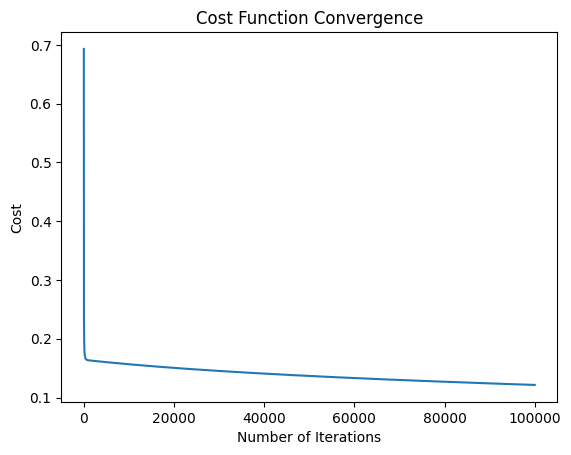

In [8]:
plt.plot(range(iterations), cost_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Convergence")
plt.show()

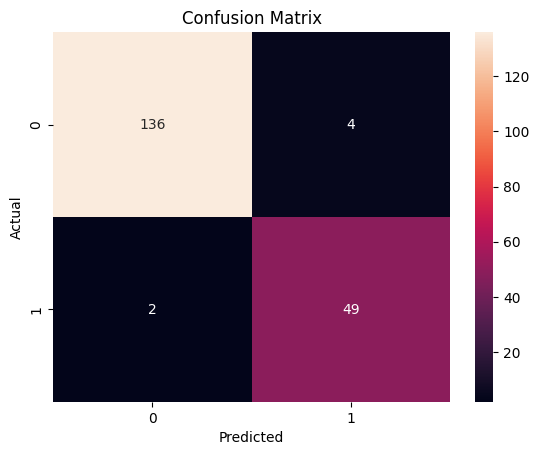

Model Accuracy: 0.9685863874345549
Precision_Score, Recall,F1: 0.9245283018867925 0.9607843137254902 0.9423076923076923


In [9]:
# Accuracy Prediction
Z = np.dot(X_test,W) + B
y_pred = sigmoid(Z)
        
threshold = 0.5
y_pred_binary = [1 if p > threshold else 0 for p in y_pred]

  # Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred_binary)
cm = confusion_matrix(Y_test,y_pred_binary)
precision= precision_score(Y_test,y_pred_binary)
recall= recall_score(Y_test,y_pred_binary)
f1 = f1_score(Y_test,y_pred_binary)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
print(f"Model Accuracy: {accuracy}")
print(f"Precision_Score, Recall,F1: {precision} {recall} {f1}")


In [10]:
odds_ratios = np.exp(W)
for feature, coef in zip(X.columns, W):
    print(f"{feature}: {coef:.4f}")
for feature, odds_ratios in zip(X.columns, odds_ratios):
    print(f"{feature}: {odds_ratios:.4f}")
print(odds_ratios)
print(W)  

AGE: 0.0626
GENDER: -0.9012
WEIGHT: -0.1287
VITAMIN_D_LEVEL: 0.2762
AGE: 1.0646
GENDER: 0.4061
WEIGHT: 0.8793
VITAMIN_D_LEVEL: 1.3181
1.318125051544542
[ 0.06264341 -0.90117772 -0.12867463  0.27621031]
